# Credit Card Fraud Detection 

Credit card fraud is a form of identity theft involving an unauthorized taking of another’s credit card information to charge purchases to the account or remove funds from it.
Technological advances have also created avenues for credit card fraud. With the rise of online purchasing, perpetrators no longer need a physical card to make an unauthorized purchase. Additionally, electronic databases containing credit card data may be hacked or crash on their own, releasing customers' credit card information. These electronic database hacks put the security of many accounts at risk at once. <br/>
<b> Goal: Create a model that would be able to detect as many fraud transactions as possible while with little false positives detections as possible.

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
%matplotlib inline
import tensorflow as tf
import os
import matplotlib.pyplot as plt, numpy as np,  pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

import ta
from ta.volatility import BollingerBands
root_notebook_folder = os.path.abspath('.')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Load Data

In [2]:
df=pd.read_csv("c:/Users/yairb/Desktop/jupyter/Machine_Learning/final_project/creditcard.csv")

# Shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (284807, 31)


# EDA - Examine data, na and other issues handeling

In [3]:
# Overview of the data
print("Overview of the data:" )
df.head()

Overview of the data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("Description of the dataset:" )
df.describe()

Description of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Features V1 to V28 are the principal components obtained by Principal Component Analysis (PCA). <br/>
The only features that have not been transformed by PCA are 'Time' and 'Amount’. <br/>
Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.  <br/>
Feature 'Amount' is the transaction amount. This feature can be used for example-dependent cost-sensitive learning. <br/>
Feature 'Class' is the response variable and it takes the value 1 in case of fraud and 0 otherwise.<br/>



Time = Amount of time (sec) between this transaction and the dataset's first transaction. <br/>
Amount = Transaction amount in USD. <br/>
Class = 1 for fraudulent transactions, 0 for non-fraudulent. <br/>


In [5]:
# Calculating the class counts and percentage
class_counts = df['Class'].value_counts()
class_counts_percentage = df['Class'].value_counts(normalize=True) * 100

# Printing the class counts and percentage
print("Class counts: \n", class_counts)
print("\nClass counts percentage: \n", class_counts_percentage)

Class counts: 
 0    284315
1       492
Name: Class, dtype: int64

Class counts percentage: 
 0    99.827251
1     0.172749
Name: Class, dtype: float64


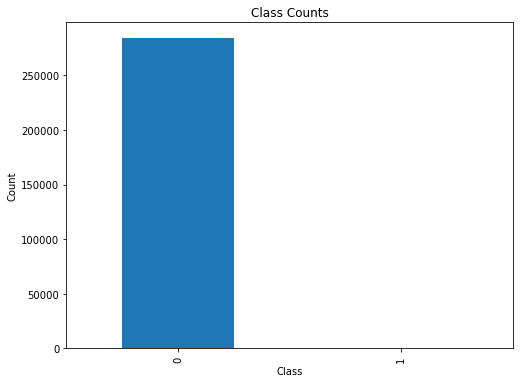

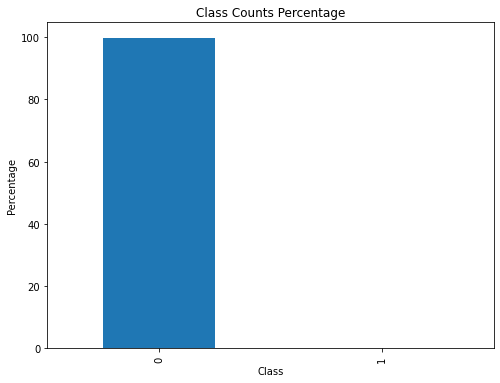

In [6]:
# Calculate the class counts and percentage
class_counts = df['Class'].value_counts()
class_counts_percentage = df['Class'].value_counts(normalize=True) * 100

# Create a bar chart of the class counts
fig, ax = plt.subplots(figsize=(8, 6))
class_counts.plot(kind='bar', ax=ax)
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Class Counts')

# Create a bar chart of the class percentages
fig, ax = plt.subplots(figsize=(8, 6))
class_counts_percentage.plot(kind='bar', ax=ax)
ax.set_xlabel('Class')
ax.set_ylabel('Percentage')
ax.set_title('Class Counts Percentage')

plt.show()

In [7]:
missing_values = df.isna().sum()
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# Data is highly in-balanced
Since the data is imbalanced we want to look at some examples of fraud and the transactions surround it (especially amount),
The next block of code would find a random row and show +10 -10 rows to see if we can learn something from it.<br/>
<br/>
With the random module, which defines a series of functions for generating or manipulating random integers, we found a random row and displayed +10 -10 rows to see if we can learn something from it.


At first we thought to use LSTM (because we have time variable), but from looking at a few examples of the surrounding we are not sure we can learn something from the the short long term memory (we might try it the comming block anyway to see results).

In [8]:


import random

# Find the indices of all rows where the target is 1
target_indices = df[df['Class'] == 1].index.tolist()

# Pick a random target index
random_index = random.choice(target_indices)

# Find the indices of the 20 rows before and after the random target index
rows_before = range(max(0, random_index - 20), random_index)
rows_after = range(random_index + 1, min(random_index + 21, len(df)))

# Select the rows from the data frame using the indices
selected_rows = df.iloc[list(rows_before) + [random_index] + list(rows_after)]

# Print the selected rows
print(selected_rows)

          Time        V1        V2        V3        V4        V5        V6  \
42508  41131.0  1.156724  0.411155  0.915068  2.512448 -0.496515 -0.436129   
42509  41131.0  1.000271 -0.423185 -0.531108  0.036118 -0.223229 -0.869147   
42510  41131.0  0.985519 -0.269804  0.208367  1.335693 -0.043395  0.541378   
42511  41132.0  1.003637 -0.018312  0.452091  1.371796 -0.258568  0.036184   
42512  41132.0 -6.101865 -0.636512 -1.674518 -2.083112  0.326079  3.924192   
42513  41132.0 -0.016794 -2.918607  0.446361  0.279370 -2.223003 -0.017006   
42514  41132.0 -0.085937  0.765550  0.812350 -0.112019  0.979286  0.421810   
42515  41133.0 -0.408107  0.319658  1.742653 -0.158505 -0.196878  0.053513   
42516  41133.0 -1.228422 -1.087696  0.754738 -3.410095  1.940582  3.449068   
42517  41134.0 -0.607942  1.469226  1.019786  1.071922 -0.300360  0.690396   
42518  41134.0 -0.358531 -3.299624 -0.449188  0.164035 -2.080510 -0.934562   
42519  41134.0 -0.748217 -0.900273  2.334042 -1.375251 -1.223612

# Histogram for each variable in the data:

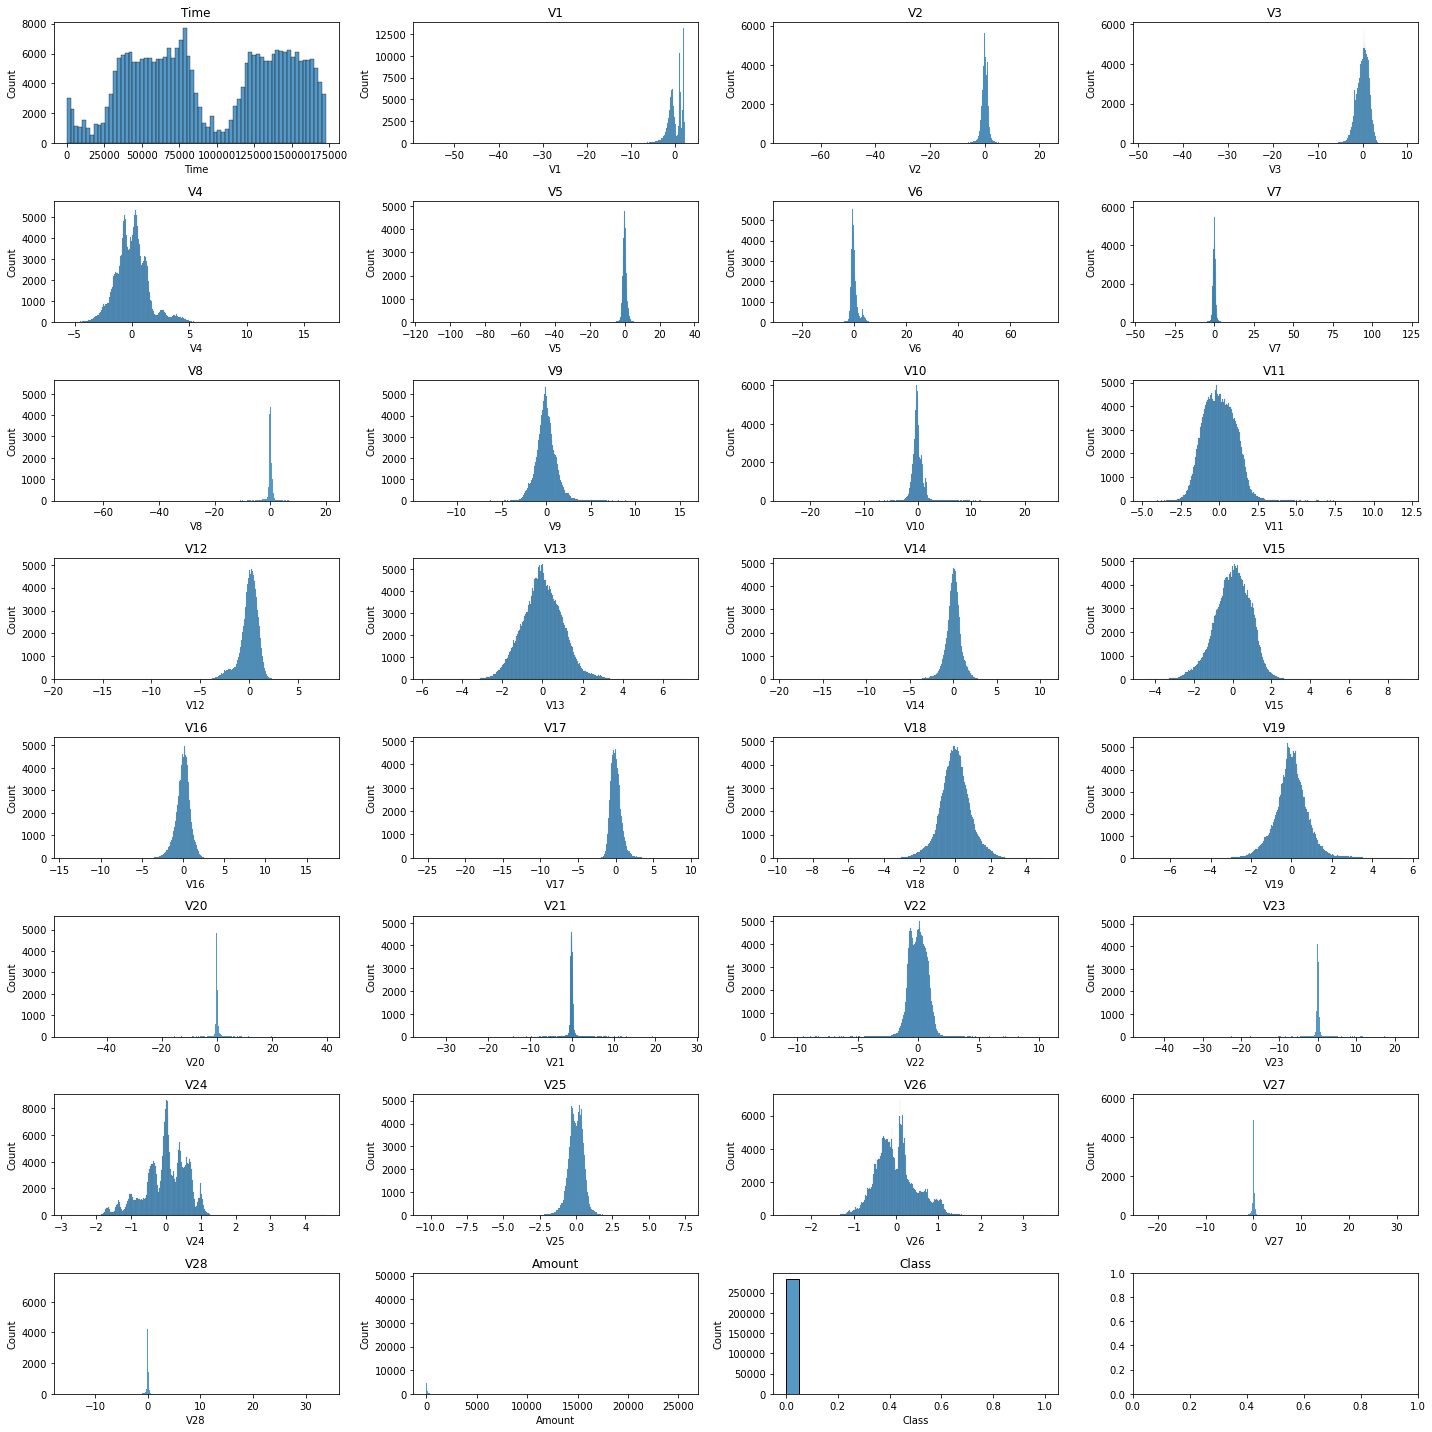

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with multiple plots
fig, axs = plt.subplots(8, 4, figsize=(20, 20))
axs = axs.ravel()

# Plot histograms for all columns
for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

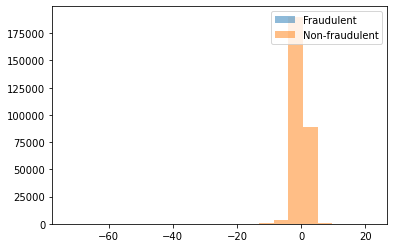

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the credit card fraud detection dataset
data =df

# Create a histogram of the "Time" input variable for fraudulent and non-fraudulent transactions
fraudulent = data[data['Class'] == 1]
non_fraudulent = data[data['Class'] == 0]
plt.hist(fraudulent['V2'], bins=20, alpha=0.5, label='Fraudulent')
plt.hist(non_fraudulent['V2'], bins=20, alpha=0.5, label='Non-fraudulent')
plt.legend(loc='upper right')
plt.show()

# Correlation between variables and class:
    conclution: seems like some variables are more correlated than others.
    V17, V12, V14 seems to be quit miningfull to target, while v13.v15 and V22 are less meanigfull.

In [11]:
# Calculate Pearson correlation coefficient between each input variable and the target variable
data = data.drop(columns = ["Time"])
corr_matrix = data.corr()
fraud_corrs = corr_matrix['Class']
print(fraud_corrs)

V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64


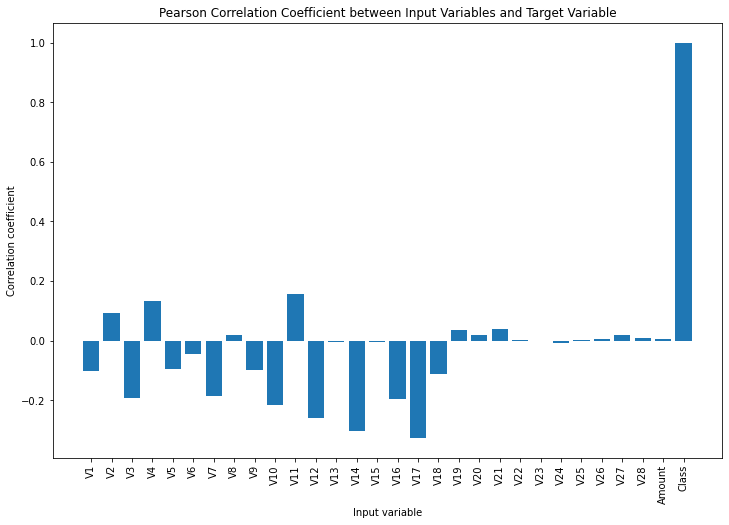

In [12]:
# Create a bar chart of the correlation coefficients
plt.figure(figsize=(12, 8))
plt.bar(fraud_corrs.index, fraud_corrs.values)
plt.xticks(rotation=90)
plt.xlabel('Input variable')
plt.ylabel('Correlation coefficient')
plt.title('Pearson Correlation Coefficient between Input Variables and Target Variable')

plt.show()

Seems like some variables are more correlated than others. V17, V12, and V14 seem to be quite meaningful to target, while V13, V15, and V22 are less meaningful.

In [13]:
fraud=df[df.Class==1]

In [14]:
non_fraud=df[df.Class==0]

<AxesSubplot:xlabel='Time', ylabel='Count'>

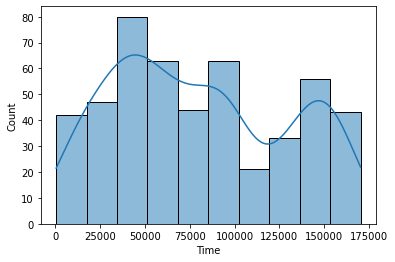

In [15]:
sns.histplot(data=fraud, x="Time", kde=True)

<AxesSubplot:xlabel='Time', ylabel='Count'>

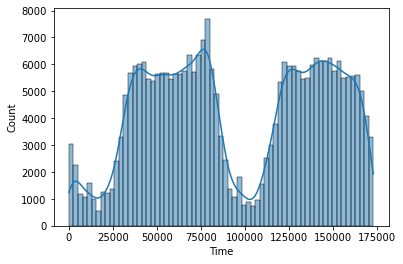

In [16]:
sns.histplot(data=non_fraud, x="Time", kde=True)

In [22]:
fraud.Amount.mean()

122.21132113821133

In [24]:
non_fraud.Amount.mean()

88.29102242225574

<AxesSubplot:xlabel='Class', ylabel='Amount'>

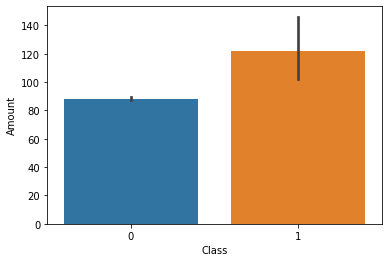

In [25]:
sns.barplot(data=df, x="Class", y="Amount")

We can see that the time trend remains the same for both fraud and Non fraud transactions <br/>
The amount does vary between fraud and non-fraud. Fraud amount average transaction is nearly 50% higher, and its confidence intervals is much higher indication a more fluctuating feature.


In [38]:
DF_for_plot=df[["Time", "V11", "V12","V14","V17","Amount"]]

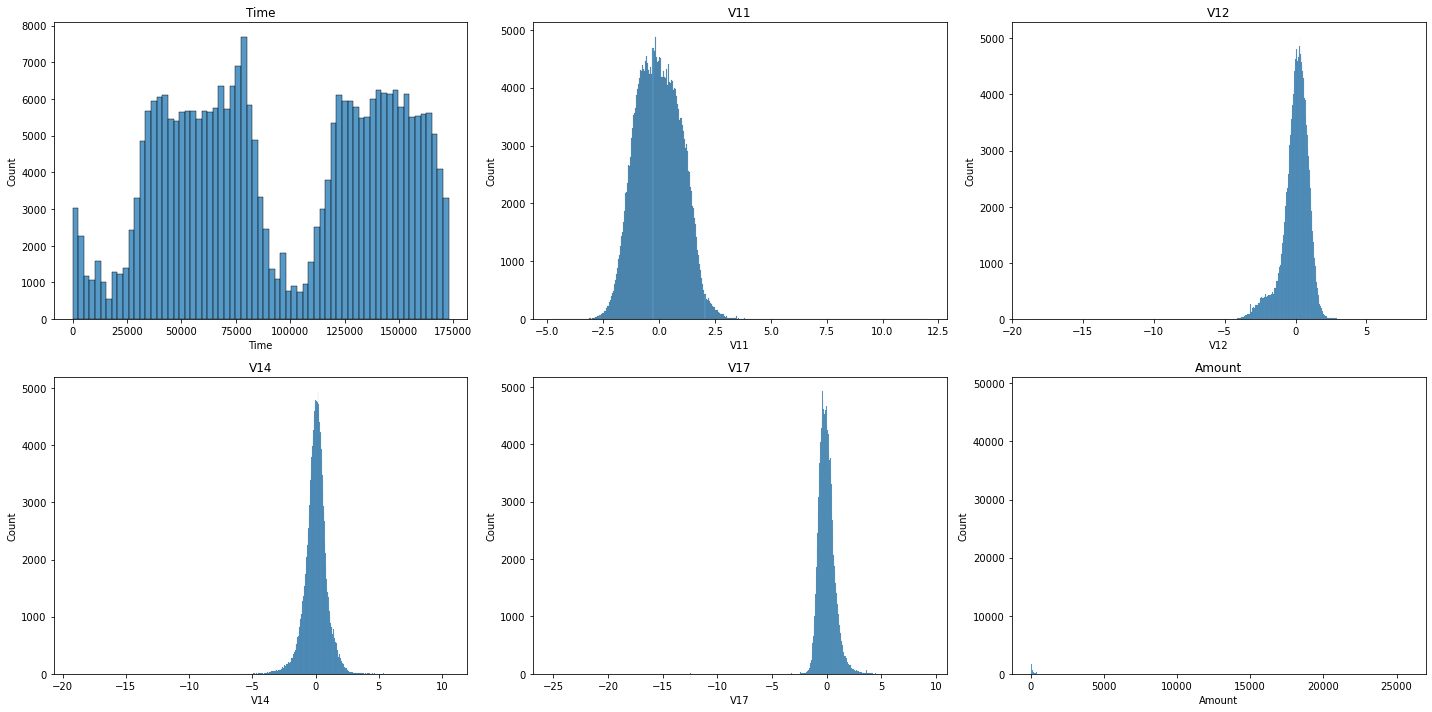

In [41]:
# Create a subplot with multiple plots
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.ravel()

# Plot histograms for all columns
for i, column in enumerate(DF_for_plot.columns):
    sns.histplot(DF_for_plot[column], ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

The distribution of the features that we identify as important due to high correlation with fraudulent activity is standard. <br/>
We can identify a trend for both time and amount.


In [36]:
#Feature Importance:
 #   We want to see feature importance using machine learning "random forest"

In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the credit card fraud detection dataset
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

# Separate input variables and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Train a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X, y)

# Print feature importances
importances = rfc.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(feature, importance)

Time 0.012467731476681601
V1 0.013161163397944656
V2 0.013837985145784739
V3 0.020420721188369666
V4 0.026598079356074108
V5 0.011054373048270014
V6 0.01279719819510434
V7 0.026973659615927473
V8 0.013479276157030462
V9 0.029355106903314814
V10 0.07354663442976928
V11 0.05127364795099016
V12 0.1326119996556785
V13 0.011684138057427684
V14 0.12943578321416463
V15 0.011121527123804502
V16 0.0776547643030783
V17 0.16419046705512536
V18 0.03261043984848221
V19 0.012865043004301021
V20 0.012940900949689011
V21 0.018315930264522582
V22 0.010347401504013809
V23 0.008168362032044253
V24 0.00975357019234747
V25 0.008215657634007459
V26 0.02046240219252417
V27 0.0134059120274354
V28 0.009252685495750087
Amount 0.011997438580342407


### About the dataset

The dataset contains transactions made with credit cards in September 2013 by European cardholders. <br/>
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. <br/>
The dataset is highly unbalanced. The positive class (frauds) accounts for 0.172% of all transactions. <br/>
It contains only numerical input variables resulting from a PCA transformation. <br/>


# Defined the metrics to examine the model
Due to the imbalance of the data and the importance of finding frauds (it's basically a pure loss), we will define metrics to examine the results. 

Selected Metrics: 

1) False Negative - Frauds that were classified as non-fraud (very significant).

2) False Positive - not fraudulent transactions that were classified as fraud.

3) True Negative - Not fraudulent transactions that were classified as non-fraud.

4) True positive - Fraud that was classified as fraud (also very important).

5) Precision - the ratio of true positives (TP) to the sum of true positives and false positives (FP). A high precision score indicates that the model has a low rate of false positives.

6) Recall - the ratio of true positives (TP) to the sum of true positives and false negatives (FN). A high recall score indicates that the model has a low rate of false negatives.

In [17]:
from tensorflow import keras

metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

In [48]:
np.unique(y)

array([0, 1])

# Try to predict with a simple model 

Measurements <br/>
Model: Reguler + Class weights <br/>
Hidden Layers: 2 <br/>
Activation: Relu <br/>
Loss Function: binary_crossentropy <br/>
Optimizer: adam <br/>
Metrics: metrics <br/>


In [49]:
from tensorflow.keras import layers, models
from sklearn.utils import class_weight



#split train and test 
train_size = int(len(df) * 0.8)
test_size = (len(df) - (train_size))



train_data = df.iloc[:train_size].copy()
test_data = df.iloc[-test_size:].copy()



#normalize the data:
# cols_to_norm = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
#        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
#        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
# scalerX = MinMaxScaler()
# scalerX.fit_transform(train_data[cols_to_norm])


# train_data[cols_to_norm] = scalerX.transform(train_data[cols_to_norm] )
# test_data[cols_to_norm] = scalerX.transform(test_data[cols_to_norm] )


trainY = np.array(train_data["Class"])
testY = np.array(test_data["Class"])
trainX =  np.array(train_data.drop(columns=["Class","Time"]))
testX =  np.array(test_data.drop(columns=["Class","Time"]))





# Define a neural network model
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(trainX.shape[1],)),
    layers.Dense(1, activation='sigmoid')
    
])


# Compile the model with binary cross-entropy loss
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)

# Train the model with class weights using the fit() method
history = model.fit(trainX, trainY, epochs=10, batch_size=2000, validation_split=0.2)

Epoch 1/10
92/92 [==============================] - 2s 9ms/step - loss: 0.1262 - fn: 263.0000 - fp: 1780.0000 - tn: 180131.0000 - tp: 102.0000 - precision: 0.0542 - recall: 0.2795 - val_loss: 0.0849 - val_fn: 40.0000 - val_fp: 70.0000 - val_tn: 45447.0000 - val_tp: 12.0000 - val_precision: 0.1463 - val_recall: 0.2308
Epoch 2/10
92/92 [==============================] - 0s 4ms/step - loss: 0.0479 - fn: 146.0000 - fp: 73.0000 - tn: 181838.0000 - tp: 219.0000 - precision: 0.7500 - recall: 0.6000 - val_loss: 0.0445 - val_fn: 35.0000 - val_fp: 16.0000 - val_tn: 45501.0000 - val_tp: 17.0000 - val_precision: 0.5152 - val_recall: 0.3269
Epoch 3/10
92/92 [==============================] - 0s 4ms/step - loss: 0.0232 - fn: 125.0000 - fp: 57.0000 - tn: 181854.0000 - tp: 240.0000 - precision: 0.8081 - recall: 0.6575 - val_loss: 0.0252 - val_fn: 40.0000 - val_fp: 6.0000 - val_tn: 45511.0000 - val_tp: 12.0000 - val_precision: 0.6667 - val_recall: 0.2308
Epoch 4/10
92/92 [==============================

# Evaluate the results:

Based on the training log, we can see that the model achieved a loss of 0.0054 on the training set and a loss of 0.0080 on the validation set after 10 epochs of training.

The model also achieved a precision of 0.8741 and a recall of 0.6973 on the validation set. This means that out of all the transactions predicted as fraudulent by the model, 87.41% of them were fraudulent, and the model correctly identified 69.73% of all fraudulent transactions.

Overall, the model seems to have performed well on the task of detecting fraudulent credit card transactions, with high precision and recall. However, further evaluation and testing would be necessary to determine how well the model generalizes to new and unseen data.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve,f1_score,precision_score,recall_score
import seaborn as sns


# Use the model to make predictions on the validation data
val_probabilities = model.predict(testX)
val_predictions =np.round(val_probabilities)

# Calculate the precision, recall, and f1-score
precision = precision_score(testY, val_predictions)
recall = recall_score(testY, val_predictions)
f1 = f1_score(testY, val_predictions)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

1781/1781 [==============================] - 5s 3ms/step
Precision:  0.9166666666666666
Recall:  0.5866666666666667
F1-Score:  0.7154471544715447


High precision but low recall. <br/>
Since our business question is highly sensitive to low recall, we must improve that parameter firstly 

# Plot model loss

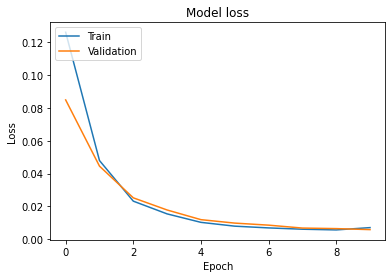

In [53]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

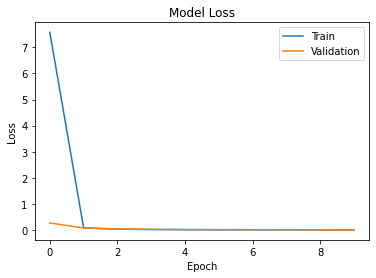

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

# Confusion matrix

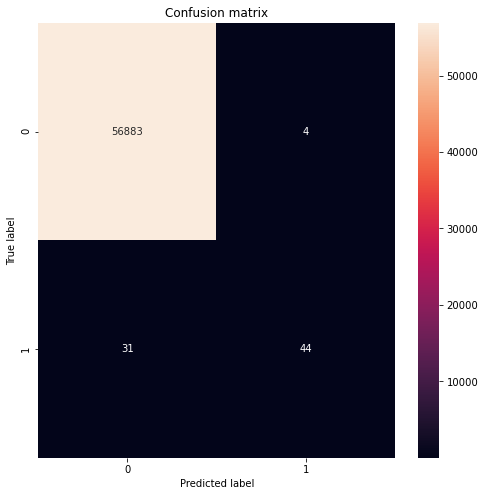

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(testY, val_predictions)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# Use wieght to overcome the imbalanced data + first prediction
To address the challenge of imbalanced data, weight can be used to improve the predictive performance of a model. By assigning different weights to different classes, a model can be trained to give more importance to the underrepresented class, leading to better predictions on the minority class. This approach has been shown to be effective in various applications where imbalanced data is a common issue.


> Indented block



In [ ]:
from tensorflow.keras import layers, models
from sklearn.utils import class_weight



#split train and test 
train_size = int(len(df) * 0.8)
test_size = (len(df) - (train_size))



train_data = df.iloc[:train_size].copy()
test_data = df.iloc[-test_size:].copy()



# #normalize the data:
# cols_to_norm = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
#        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
#        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
# scalerX = MinMaxScaler()
# scalerX.fit_transform(train_data[cols_to_norm])


# train_data[cols_to_norm] = scalerX.transform(train_data[cols_to_norm] )
# test_data[cols_to_norm] = scalerX.transform(test_data[cols_to_norm] )


trainY = np.array(train_data["Class"])
testY = np.array(test_data["Class"])
trainX =  np.array(train_data.drop(columns=["Class","Time"]))
testX =  np.array(test_data.drop(columns=["Class","Time"]))


# Calculate class weights to adjust for imbalanced dataset
class_weights = dict(zip(np.unique(y), class_weight.compute_class_weight('balanced', np.unique(trainY), trainY)))


# class_weights = {0: 1, 1: 200}




# Define a neural network model
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(trainX.shape[1],)),
    layers.Dense(1, activation='sigmoid')
    
])


# Compile the model with binary cross-entropy loss
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)

# Train the model with class weights using the fit() method
history = model.fit(trainX, trainY, epochs=40, batch_size=500, validation_split=0.2, class_weight=class_weights)

Epoch 1/40
365/365 [==============================] - 3s 5ms/step - loss: 1.4759 - fn: 44.0000 - fp: 53451.0000 - tn: 173977.0000 - tp: 373.0000 - precision: 0.0069 - recall: 0.8945 - val_loss: 0.2263 - val_fn: 15.0000 - val_fp: 3003.0000 - val_tn: 42514.0000 - val_tp: 37.0000 - val_precision: 0.0122 - val_recall: 0.7115
Epoch 2/40
365/365 [==============================] - 2s 4ms/step - loss: 0.4487 - fn: 37.0000 - fp: 16647.0000 - tn: 165264.0000 - tp: 328.0000 - precision: 0.0193 - recall: 0.8986 - val_loss: 1.3317 - val_fn: 2.0000 - val_fp: 14462.0000 - val_tn: 31055.0000 - val_tp: 50.0000 - val_precision: 0.0034 - val_recall: 0.9615
Epoch 3/40
365/365 [==============================] - 1s 4ms/step - loss: 0.3213 - fn: 36.0000 - fp: 12433.0000 - tn: 169478.0000 - tp: 329.0000 - precision: 0.0258 - recall: 0.9014 - val_loss: 0.5925 - val_fn: 4.0000 - val_fp: 7722.0000 - val_tn: 37795.0000 - val_tp: 48.0000 - val_precision: 0.0062 - val_recall: 0.9231
Epoch 4/40
365/365 [============

# Evaluate the results:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve,f1_score,precision_score,recall_score
import seaborn as sns


# Use the model to make predictions on the validation data
val_probabilities = model.predict(testX)
val_predictions =np.round(val_probabilities)

# Calculate the precision, recall, and f1-score
precision = precision_score(testY, val_predictions)
recall = recall_score(testY, val_predictions)
f1 = f1_score(testY, val_predictions)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

1781/1781 [==============================] - 3s 2ms/step
Precision:  0.08418367346938775
Recall:  0.88
F1-Score:  0.15366705471478465


The method chosen in this model to handle the imbalanced data was not correct. <br/>
The model over predicted the data to be fraud. While it was good for recall (almost 1) it was bad for precision, which is almost 0

# Plot model loss

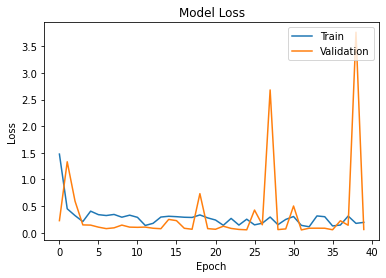

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

# Confusion matrix

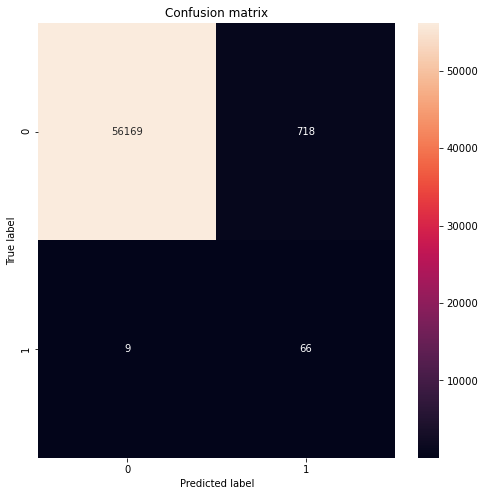

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(testY, val_predictions)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# First prediction conclutions:
We did not choose a corret method to handle the imbalanced data, we would try another method.
while the model predicted all the data to be fraud. 
recall = 1
but percision is almost 0


# Over Samaling using smote

Measurements <br/>
Model: SMOTE <br/>
Hidden Layers: 2 <br/>
Activation: relu <br/>
Loss Function: binary_crossentropy <br/>
Optimizer: adam <br/>
Metrics: metrics


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE



from tensorflow.keras import layers, models
from sklearn.utils import class_weight



#split train and test 
train_size = int(len(df) * 0.8)
test_size = (len(df) - (train_size))



train_data = df.iloc[:train_size].copy()
test_data = df.iloc[-test_size:].copy()



# #normalize the data:
# cols_to_norm = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
#        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
#        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
# scalerX = MinMaxScaler()
# scalerX.fit_transform(train_data[cols_to_norm])


# train_data[cols_to_norm] = scalerX.transform(train_data[cols_to_norm] )
# test_data[cols_to_norm] = scalerX.transform(test_data[cols_to_norm] )


trainY = np.array(train_data["Class"])
testY = np.array(test_data["Class"])
trainX =  np.array(train_data.drop(columns=["Class","Time"]))
testX =  np.array(test_data.drop(columns=["Class","Time"]))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(trainX,trainY)




# Define a neural network model
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(trainX.shape[1],)),
    layers.Dense(1, activation='sigmoid')
    
])


# Compile the model with binary cross-entropy loss
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)

# Train the model with class weights using the fit() method
history = model.fit(X_resampled, y_resampled, epochs=40, batch_size=2000, validation_split=0.2)

Epoch 1/40
182/182 [==============================] - 2s 8ms/step - loss: 0.4319 - fn: 13460.0000 - fp: 33785.0000 - tn: 239160.0000 - tp: 123048.0000 - precision: 0.7846 - recall: 0.9014 - val_loss: 0.1482 - val_fn: 8033.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_tp: 82939.0000 - val_precision: 1.0000 - val_recall: 0.9117
Epoch 2/40
182/182 [==============================] - 1s 6ms/step - loss: 0.1124 - fn: 10753.0000 - fp: 1881.0000 - tn: 225547.0000 - tp: 125703.0000 - precision: 0.9853 - recall: 0.9212 - val_loss: 0.1344 - val_fn: 6579.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_tp: 84393.0000 - val_precision: 1.0000 - val_recall: 0.9277
Epoch 3/40
182/182 [==============================] - 1s 6ms/step - loss: 0.0807 - fn: 8795.0000 - fp: 1709.0000 - tn: 225719.0000 - tp: 127661.0000 - precision: 0.9868 - recall: 0.9355 - val_loss: 0.1386 - val_fn: 6081.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_tp: 84891.0000 - val_precision: 1.0000 - val_recall: 0.933

Epoch 26/40
182/182 [==============================] - 1s 6ms/step - loss: 0.0158 - fn: 597.0000 - fp: 782.0000 - tn: 226646.0000 - tp: 135859.0000 - precision: 0.9943 - recall: 0.9956 - val_loss: 0.0171 - val_fn: 326.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_tp: 90646.0000 - val_precision: 1.0000 - val_recall: 0.9964
Epoch 27/40
182/182 [==============================] - 1s 6ms/step - loss: 0.0156 - fn: 578.0000 - fp: 773.0000 - tn: 226655.0000 - tp: 135878.0000 - precision: 0.9943 - recall: 0.9958 - val_loss: 0.0147 - val_fn: 223.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_tp: 90749.0000 - val_precision: 1.0000 - val_recall: 0.9975
Epoch 28/40
182/182 [==============================] - 1s 6ms/step - loss: 0.0149 - fn: 545.0000 - fp: 756.0000 - tn: 226672.0000 - tp: 135911.0000 - precision: 0.9945 - recall: 0.9960 - val_loss: 0.0155 - val_fn: 258.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_tp: 90714.0000 - val_precision: 1.0000 - val_recall: 0.9972
Epoch 2

# Evaluate the results:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve,f1_score,precision_score,recall_score
import seaborn as sns


# Use the model to make predictions on the validation data
val_probabilities = model.predict(testX)
val_predictions =np.round(val_probabilities)

# Calculate the precision, recall, and f1-score
precision = precision_score(testY, val_predictions)
recall = recall_score(testY, val_predictions)
f1 = f1_score(testY, val_predictions)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

1781/1781 [==============================] - 3s 2ms/step
Precision:  0.33519553072625696
Recall:  0.8
F1-Score:  0.4724409448818897


While the model kept its high Recall score on validation set, it did not sufficiently improve its precision. <br/>
But it is in the right direction so we will try to play with the model parameters to achieve better precision while keeping and improving recall rate. 

# Plot model loss

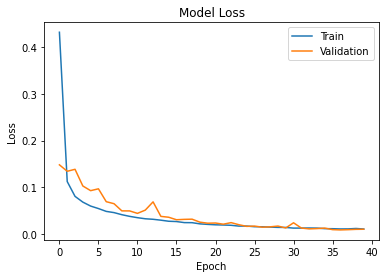

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

# Confusion matrix

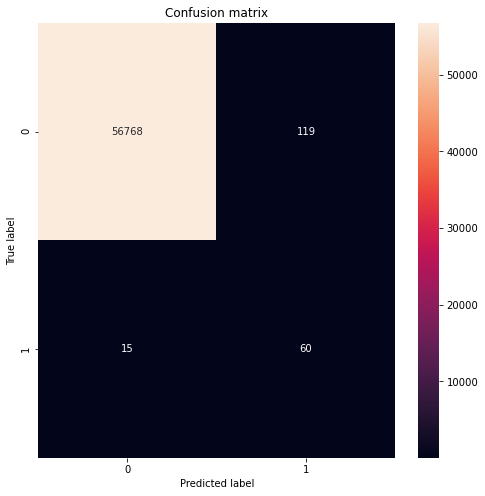

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(testY, val_predictions)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# Lets Continue with this and try to comlicate the model and play with some parameters

Measurements <br/>
Model: SMOTE <br/>
Hidden Layers: 3 (256 > 10 > 1) <br/>
Activation: relu <br/>
Loss Function: binary_crossentropy <br/>
Optimizer: adam <br/>
Metrics: metrics


In [ ]:

# Define a neural network model
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(trainX.shape[1],)),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    
])


# Compile the model with binary cross-entropy loss
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)

# Train the model with class weights using the fit() method
history = model.fit(X_resampled, y_resampled, epochs=20, batch_size=50, validation_split=0.2)

Epoch 1/20
7278/7278 [==============================] - 32s 4ms/step - loss: 0.0905 - fn: 3454.0000 - fp: 2518.0000 - tn: 452338.0000 - tp: 360430.0000 - precision: 0.9931 - recall: 0.9905 - val_loss: 0.0264 - val_fn: 695.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_tp: 90277.0000 - val_precision: 1.0000 - val_recall: 0.9924
Epoch 2/20
7278/7278 [==============================] - 31s 4ms/step - loss: 0.0249 - fn: 1702.0000 - fp: 915.0000 - tn: 226513.0000 - tp: 134754.0000 - precision: 0.9933 - recall: 0.9875 - val_loss: 0.0187 - val_fn: 531.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_tp: 90441.0000 - val_precision: 1.0000 - val_recall: 0.9942
Epoch 3/20
7278/7278 [==============================] - 31s 4ms/step - loss: 0.0147 - fn: 754.0000 - fp: 799.0000 - tn: 226629.0000 - tp: 135702.0000 - precision: 0.9941 - recall: 0.9945 - val_loss: 0.0137 - val_fn: 329.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_tp: 90643.0000 - val_precision: 1.0000 - val_recall: 0.996

# Evaluate the results:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve,f1_score,precision_score,recall_score
import seaborn as sns


# Use the model to make predictions on the validation data
val_probabilities = model.predict(testX)
val_predictions =np.round(val_probabilities)

# Calculate the precision, recall, and f1-score
precision = precision_score(testY, val_predictions)
recall = recall_score(testY, val_predictions)
f1 = f1_score(testY, val_predictions)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

1781/1781 [==============================] - 4s 2ms/step
Precision:  0.35294117647058826
Recall:  0.8
F1-Score:  0.489795918367347


Recall remains flat, precision slightly improves. <br/>
Addition unreported changes in the parameters did not have other improving effect on overall score.

# Plot model loss

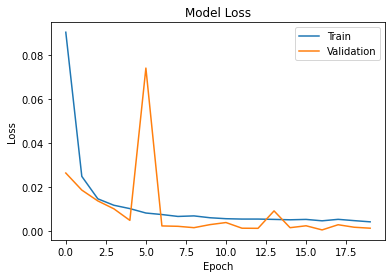

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

# Confusion matrix

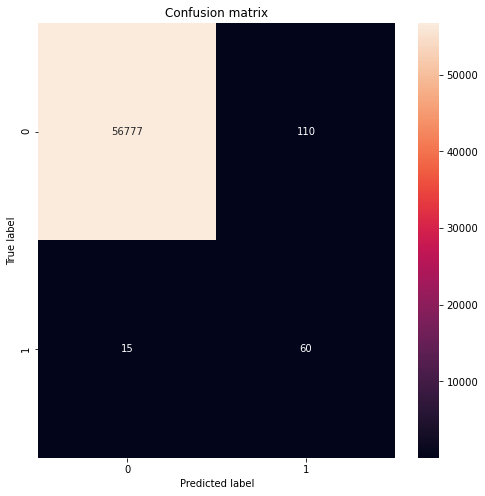

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(testY, val_predictions)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# Lets See if time has an effect!

In [ ]:
def sliding_windows(data, history_samples, horizon_samples):
    x = []
    y = []
    for i in range(len(data)-history_samples-horizon_samples):
        _y = data.iloc[i+history_samples:i+history_samples+horizon_samples,29:30]
        y.append(_y)
    data_x = data
    data_x = data_x.drop(columns=["Class"])
    for i in range(len(data)-history_samples-horizon_samples):
        _x = data_x.iloc[i:(i+history_samples)]
        x.append(_x)
    return np.array(x),np.array(y)


In [ ]:
history_samples=30
horizon_samples=1

# df = df.drop(columns=["Time"])
# split into train and test sets
train_size = int(len(df) * 0.8)-(history_samples+horizon_samples)
test_size = (len(df) - (train_size  + history_samples + horizon_samples))



train_data = df.iloc[:train_size].copy()
test_data = df.iloc[-test_size:].copy()

# #normalize the data:

# scalerX = MinMaxScaler()
# scalerX.fit_transform(train_data[cols_to_norm])


# train_data[cols_to_norm] = scalerX.transform(train_data[cols_to_norm] )
# test_data[cols_to_norm] = scalerX.transform(test_data[cols_to_norm] )



# train_data['Class'] = train_data['Class']

# test_data['Class'] = test_data['Class']

# create train and test sets
trainX,trainY =  sliding_windows(train_data, history_samples, horizon_samples)
testX,testY = sliding_windows(test_data, history_samples, horizon_samples)



In [ ]:
from tensorflow import keras

# Apply SMOTE to balance the dataset
# smote = SMOTE(random_state=42)
# new_shape = (len(trainY)  ,1)
# X_resampled, y_resampled = smote.fit_resample(trainX,trainY.reshape(new_shape))

cols_to_norm = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
n_features = len(cols_to_norm)


# Build the LSTM model 

model = Sequential()
model.add(LSTM(units=52, activation='relu',return_sequences=False, input_shape=(history_samples, n_features)))

# model.add(LSTM(units=120, activation='selu',return_sequences=False, input_shape=(n_steps, n_features)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

# Train the model
model.fit(np.array(X_undersampled),np.array(y_undersampled) , epochs=10, batch_size = 2000)



In [ ]:
import numpy as np
import pandas as pd



# Separate input variables and target variable
X = data.drop(columns = ['Class','Time'], axis=1)
y = data['Class']

# Determine the number of samples for the minority class
minority_class_size = np.sum(y == 1)

# Find the indices of the minority class
minority_class_indices = np.where(y == 1)[0]

# Select a random subset of the majority class
majority_class_indices = np.random.choice(np.where(y == 0)[0], size=minority_class_size, replace=False)

# Combine the minority class indices with the selected majority class indices
undersampled_indices = np.concatenate([minority_class_indices, majority_class_indices])

# Sort the indices in chronological order
undersampled_indices.sort()

# Create sliding windows of length 30
window_size = 10
X_windows = []
y_windows = []
for i in range(window_size, len(undersampled_indices)):
    window_indices = undersampled_indices[i-window_size:i]
    X_window = X.iloc[window_indices]
    y_window = y.iloc[i]
    X_windows.append(X_window)
    y_windows.append(y_window)

# Convert windows to numpy arrays
X_windows = np.array(X_windows)
y_windows = np.array(y_windows)

# Split data into training and validation sets
split_index = int(0.8 * len(X_windows))
X_train = X_windows[:split_index]
y_train = y_windows[:split_index]
X_val = X_windows[split_index:]
y_val = y_windows[split_index:]

# Define and train LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(32, input_shape=(window_size, X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)

model.fit(X_train, y_train, epochs=10,batch_size =50, validation_data=(X_val, y_val))

Epoch 1/10
16/16 [==============================] - 4s 65ms/step - loss: 0.5408 - fn: 2.0000 - fp: 181.0000 - tn: 787.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3834 - val_fn: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 195.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 15ms/step - loss: 0.2557 - fn: 2.0000 - fp: 0.0000e+00 - tn: 777.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1824 - val_fn: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 195.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 16ms/step - loss: 0.1246 - fn: 2.0000 - fp: 0.0000e+00 - tn: 777.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0715 - val_fn: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 195.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - va

In [ ]:
X_undersampled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
582,-0.679293,1.120837,1.319394,1.249827,1.147786,-0.086534,1.001436,-0.039752,-1.374497,0.012874,...,-0.011141,0.067521,0.030112,-0.296954,-0.619850,0.282799,-0.059404,0.048695,0.109200,25.03
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
1534,1.364563,-1.178268,0.650371,-1.283988,-1.740504,-0.877664,-0.948682,-0.222741,-1.824012,1.366103,...,-0.145875,-0.319807,-0.707460,0.110777,0.357286,0.122213,-0.419706,0.032784,0.043429,84.68
1809,-0.897765,0.943783,1.563014,-0.714289,-0.108453,-0.481893,0.603119,0.161312,0.117975,-0.248992,...,0.122368,-0.186295,-0.292765,-0.162413,0.343573,0.018086,0.366589,0.382679,0.214166,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282968,-0.220522,0.844165,0.512722,-0.800303,0.841037,-0.260056,0.907761,-0.003434,-0.710946,-0.443150,...,-0.105729,0.295947,0.822719,-0.209855,0.748359,-0.343216,0.268052,0.107008,0.162542,4.95
283628,1.925960,-0.248421,-0.807847,0.338177,-0.510596,-0.729352,-0.508239,0.032435,1.368297,-0.709728,...,-0.174745,-0.234909,-0.637940,0.447438,0.931867,-0.581140,-0.335887,0.013400,0.002970,27.66
284144,-1.045850,2.024365,-1.508737,-0.557827,1.705748,-2.251271,1.911448,-0.126141,-1.090551,-2.534583,...,-0.215417,0.190424,0.462549,-0.876697,-0.155998,1.747265,-0.121526,-0.130087,0.001125,8.00
284309,-2.583118,2.936337,-1.960681,-0.190599,-1.536309,-2.011599,-0.712777,1.800044,-0.271601,-0.197815,...,-0.035834,0.535812,1.441718,0.270734,0.914286,-0.575906,-0.245615,0.314288,0.252057,0.99


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve,f1_score,precision_score,recall_score
import seaborn as sns


# Use the model to make predictions on the validation data
val_probabilities = model.predict(testX)
val_predictions =np.round(val_probabilities)

# Calculate the precision, recall, and f1-score
precision = precision_score(testY, val_predictions)
recall = recall_score(testY, val_predictions)
f1 = f1_score(testY, val_predictions)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

In [ ]:
new_shape = (113912  ,1)
testY.reshape(new_shape)
precision = precision_score(val_predictions, val_predictions)
recall = recall_score(testY, val_predictions)
f1 = f1_score(testY, val_predictions)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)